In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
ad = pd.read_csv(r'C:\Users\Aashima Bhatia\OneDrive\Desktop\dataset\click_advertisement.csv')
print("dataset downloaded successfully")

dataset downloaded successfully


In [3]:
ad.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [4]:
ad.tail()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
6652,1215532,69.08,23,57756.89,195.68,product_29,Jersey,City_4,Yes,Night,Thursday,April,2020,0
6653,1199837,72.23,23,52968.22,247.90,product_25,Madagascar,City_5,Yes,Noon,Sunday,July,2020,0
6654,8523595,57.20,56,24079.00,129.23,product_24,Algeria,City_2,No,Morning,Thursday,April,2020,1
6655,2584490,88.04,28,64188.50,241.03,product_18,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,January,2020,0
6656,4315798,68.01,20,59761.56,214.53,product_22,Serbia,City_5,No,Night,Wednesday,July,2020,1


In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [6]:
ad.describe()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657.0,6657.000000
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,2020.0,1.000000
max,9.999708e+06,91.430000,61.000000,79484.800000,269.960000,2020.0,1.000000


In [7]:
ad.shape

(6657, 14)

In [8]:
ad.isnull().sum()

VistID            0
Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
Country_Name      0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Year              0
Clicked           0
dtype: int64

In [9]:
print("Target Variable Distribution:")
print(ad['Clicked'].value_counts())

Target Variable Distribution:
Clicked
0    3619
1    3038
Name: count, dtype: int64


In [10]:
ad_num = ad.select_dtypes(include=['int64', 'float64'])
ad_num.corr()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Year,Clicked
VistID,1.000000,-0.004147,-0.007503,0.017145,-0.000016,NaN,-0.004260
Time_Spent,-0.004147,1.000000,-0.185667,0.364737,0.588360,NaN,-0.712439
Age,-0.007503,-0.185667,1.000000,-0.104503,-0.199750,NaN,0.244121
Avg_Income,0.017145,0.364737,-0.104503,1.000000,0.383978,NaN,-0.460287
Internet_Usage,-0.000016,0.588360,-0.199750,0.383978,1.000000,NaN,-0.742764
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clicked,-0.004260,-0.712439,0.244121,-0.460287,-0.742764,NaN,1.000000


In [11]:
ad_num = ad.select_dtypes(exclude=['object'])
ad_num.groupby('Clicked').mean()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Year
Clicked,,,,,,
0,5.552247e+06,76.972736,34.799668,61459.018030,214.337695,2020.0
1,5.530044e+06,54.790359,40.188282,49344.655695,149.937001,2020.0


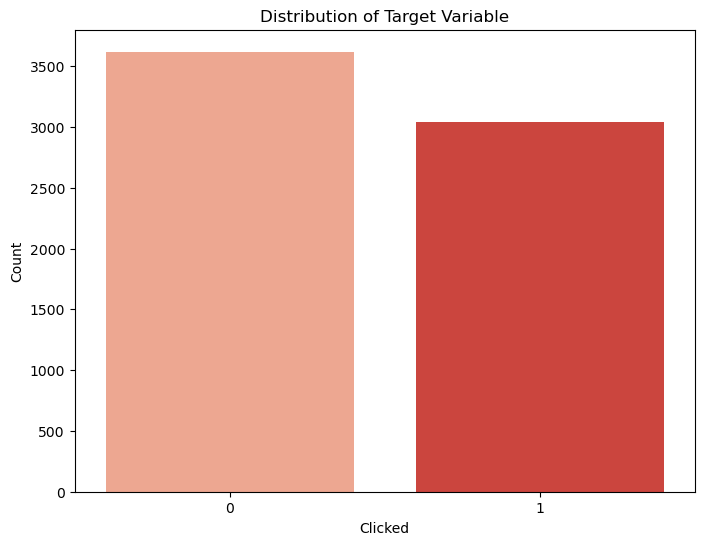

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='Clicked', data=ad,palette='Reds')
plt.title('Distribution of Target Variable')
plt.xlabel('Clicked')
plt.ylabel('Count')
plt.show()

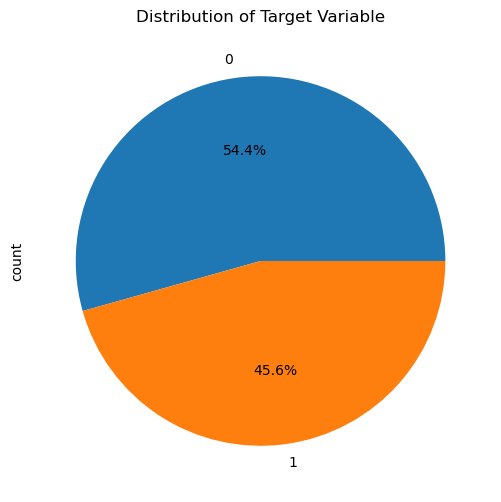

In [13]:
plt.figure(figsize=(8,6))
ad['Clicked'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.show()

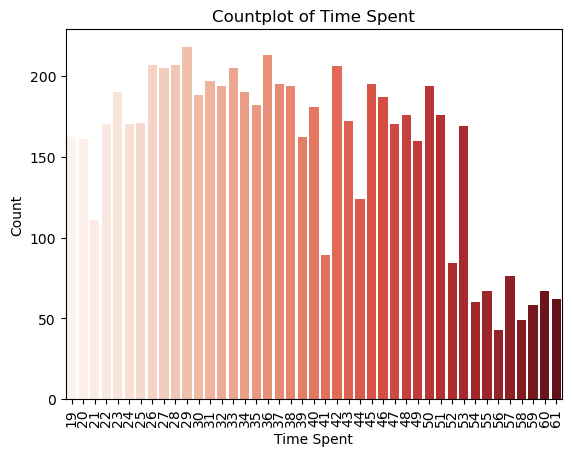

In [14]:
sns.countplot(x=ad['Age'],palette='Reds')
plt.title('Countplot of Time Spent')
plt.xticks(rotation=90)
plt.xlabel('Time Spent')
plt.ylabel('Count')
plt.show()

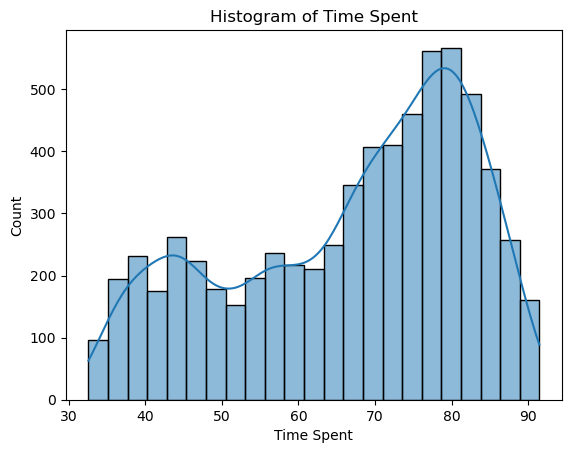

In [15]:
sns.histplot(ad['Time_Spent'], kde=True)
plt.title('Histogram of Time Spent')
plt.xlabel('Time Spent')
plt.ylabel('Count')
plt.show()

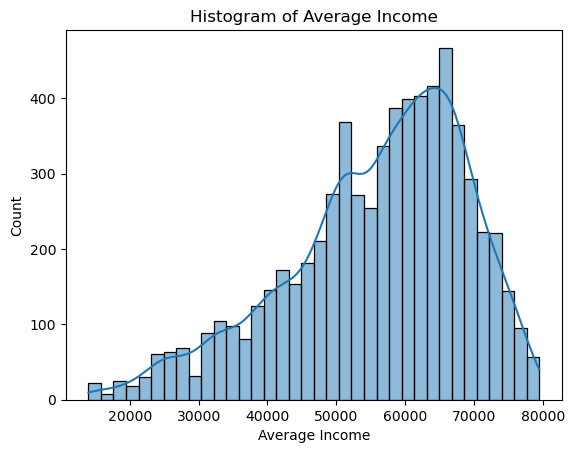

In [16]:
sns.histplot(ad['Avg_Income'], kde=True)
plt.title('Histogram of Average Income')
plt.xlabel('Average Income')
plt.ylabel('Count')
plt.show()

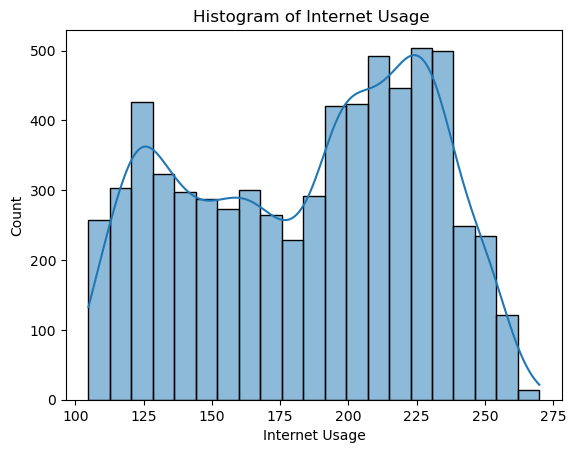

In [17]:
sns.histplot(ad['Internet_Usage'], kde=True)
plt.title('Histogram of Internet Usage ')
plt.xlabel('Internet Usage')
plt.ylabel('Count')
plt.show()

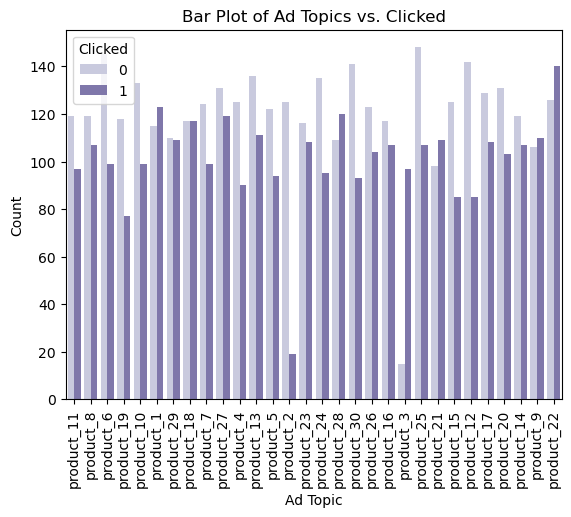

In [18]:
sns.countplot(x='Ad_Topic', hue='Clicked', data=ad,palette='Purples')
plt.title('Bar Plot of Ad Topics vs. Clicked')
plt.xticks(rotation=90)
plt.xlabel('Ad Topic')
plt.ylabel('Count')
plt.show()

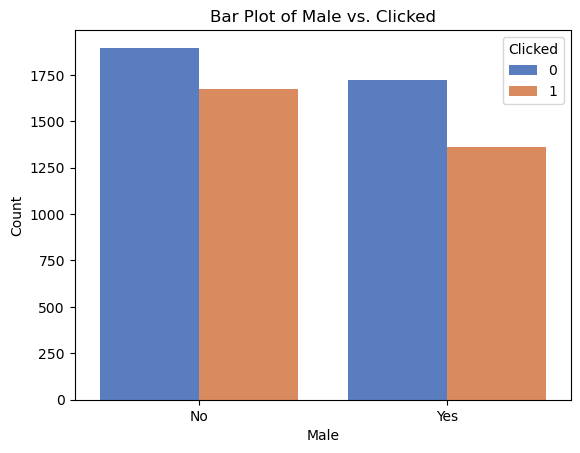

In [19]:
sns.countplot(x='Male', hue='Clicked', data=ad,palette='muted')
plt.title('Bar Plot of Male vs. Clicked')
plt.xlabel('Male')
plt.ylabel('Count')
plt.show()

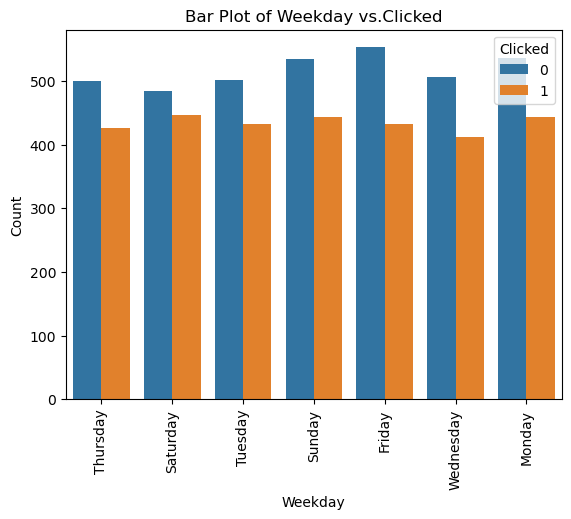

In [20]:
sns.countplot(x='Weekday', hue='Clicked', data=ad)
plt.title('Bar Plot of Weekday vs.Clicked')
plt.xticks(rotation=90)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Clicked', ylabel='Density'>

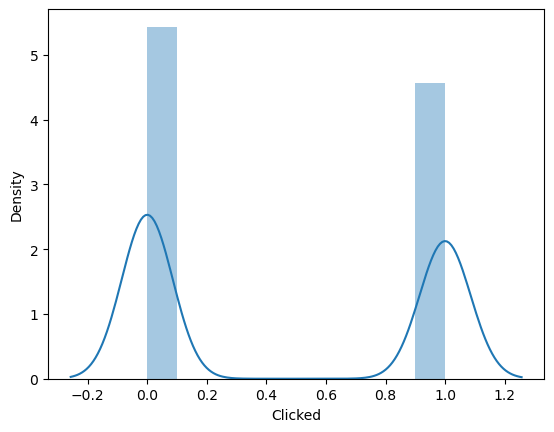

In [21]:
sns.distplot(ad['Clicked'])

VistID               Axes(0.125,0.712609;0.168478x0.167391)
Time_Spent        Axes(0.327174,0.712609;0.168478x0.167391)
Age               Axes(0.529348,0.712609;0.168478x0.167391)
Avg_Income        Axes(0.731522,0.712609;0.168478x0.167391)
Internet_Usage       Axes(0.125,0.511739;0.168478x0.167391)
Year              Axes(0.327174,0.511739;0.168478x0.167391)
Clicked           Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

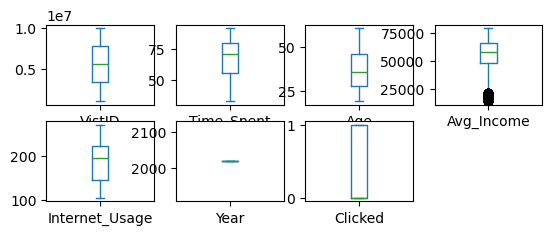

In [22]:
ad.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

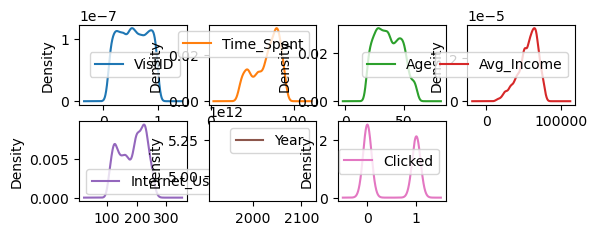

In [23]:
ad.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

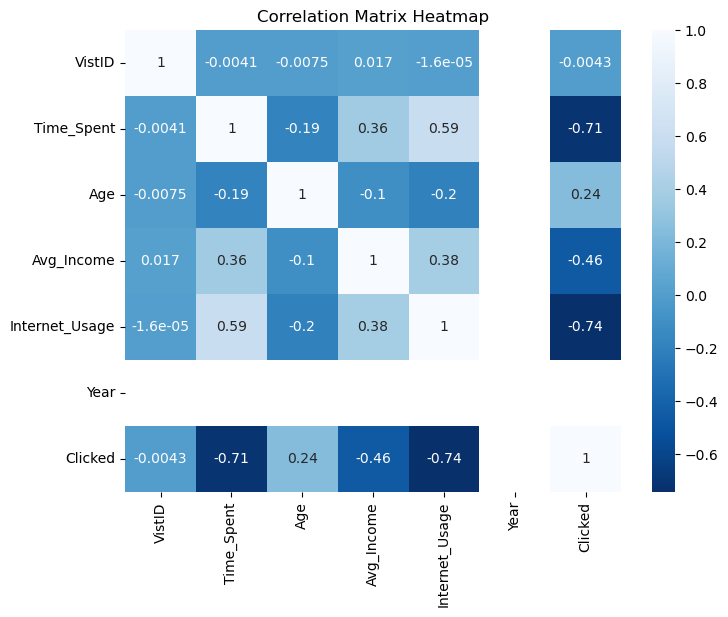

In [24]:
from sklearn.preprocessing import LabelEncoder


numeric_cols = ad.select_dtypes(include=['int64', 'float64'])

corr_matrix= numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues_r')

plt.title('Correlation Matrix Heatmap')

plt.show()

In [25]:
from statistics import mode
numeric_data = ad.select_dtypes(include=['int64', 'float64'])

means = numeric_data.mean()
print("\nMean of each numeric column:")
print(means)

medians = numeric_data.median()
print("\nMedian of each numeric column:")
print(medians)

modes = numeric_data.mode()
print("\nMode of each numeric column:")
print(modes)

print("\nAll statistical summary:")
print(numeric_data.describe())



Mean of each numeric column:
VistID            5.542115e+06
Time_Spent        6.684955e+01
Age               3.725883e+01
Avg_Income        5.593049e+04
Internet_Usage    1.849477e+02
Year              2.020000e+03
Clicked           4.563617e-01
dtype: float64

Median of each numeric column:
VistID            5523907.00
Time_Spent             70.66
Age                    36.00
Avg_Income          58183.00
Internet_Usage        193.58
Year                 2020.00
Clicked                 0.00
dtype: float64

Mode of each numeric column:
       VistID  Time_Spent   Age  Avg_Income  Internet_Usage    Year  Clicked
0     1000187       73.89  29.0    67516.07          164.25  2020.0      0.0
1     1000645         NaN   NaN         NaN          222.11     NaN      NaN
2     1001347         NaN   NaN         NaN             NaN     NaN      NaN
3     1002135         NaN   NaN         NaN             NaN     NaN      NaN
4     1003369         NaN   NaN         NaN             NaN     NaN      

In [26]:
ad['City_code'].nunique()

9

In [27]:
ad['Ad_Topic'].nunique()

30

In [28]:
from sklearn.preprocessing import LabelEncoder 
bi_var = [col for col in ad.columns if len(ad[col].unique()) == 2]
cat_col = [col for col in ad.select_dtypes(['object']).columns.tolist() if col not in bi_var]
encoder = LabelEncoder()
for i in bi_var:
    ad[i] = encoder.fit_transform(ad[i])

ad = pd.get_dummies(ad,columns = cat_col)

In [29]:
ad.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Year,Clicked,Ad_Topic_product_1,Ad_Topic_product_10,...,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_April,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May
0,5183153,87.97,43,55901.12,185.46,0,2020,0,False,False,...,True,False,False,False,False,False,True,False,False,False
1,4023265,51.63,50,39132.00,176.73,0,2020,1,False,False,...,False,False,False,False,False,False,False,True,False,False
2,4708083,82.37,38,57032.36,210.60,0,2020,0,False,False,...,False,True,False,False,False,True,False,False,False,False
3,9771815,62.06,45,48868.00,190.05,1,2020,1,False,False,...,True,False,False,True,False,False,False,False,False,False
4,6451317,77.66,31,61608.23,204.86,0,2020,0,False,False,...,True,False,False,False,False,True,False,False,False,False


In [30]:
X = ad.drop(['Clicked'], axis = 1)
Y = ad['Clicked']

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8998998998998999


In [34]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[1026   63]
 [ 137  772]]


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9109109109109109


In [36]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.9434434434434434


In [37]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.9404404404404404


In [38]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','Xgboost'],
    'Score': [0.899,0.910,0.943,0.940]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.943,Random Forest
0.940,Xgboost
0.910,Decision Tree
0.899,Logistic Regression


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

rf = RandomForestClassifier(n_estimators=50,
                          criterion='gini',
                          max_features='sqrt',
                          min_samples_leaf=1,
                          min_samples_split=2)
rf.fit(X_train_scaled, Y_train)

X_test_scaled = scaler.transform(X_test)
y_pred_rf = rf.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[1074   31]
 [ 103  790]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1105
           1       0.96      0.88      0.92       893

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998



In [40]:
from sklearn.model_selection import GridSearchCV, train_test_split
import pickle


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

with open('model.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Best Parameters:", loaded_model.best_params_)
print("Model loaded successfully")

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Model loaded successfully
